In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [3]:
df = pd.read_csv("car_evaluation.csv")

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
col_names = ["buying", "maintenance", "doors", "persons", "lug_boot", "safety", "class"]

In [6]:
df.columns = col_names

In [7]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintenance
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

In [11]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [12]:
df["doors"] = df["doors"].replace("5more", "5")

In [13]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [14]:
df["doors"] = df["doors"].astype(int)

In [15]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [16]:
df["persons"] = df["persons"].replace("more", "5")

In [17]:
df["persons"] = df["persons"].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   int64 
 3   persons      1727 non-null   int64 
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


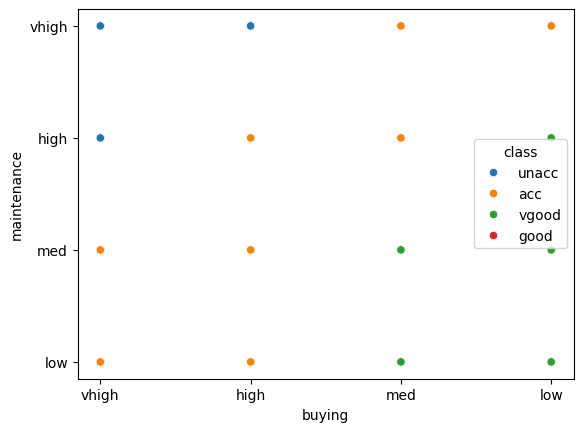

In [19]:
sns.scatterplot(x=df["buying"], y=df["maintenance"], hue=df["class"])

plt.show()

In [20]:
X = df.drop("class", axis=1)

y = df["class"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
categorial_cols = ["buying", "maintenance", "lug_boot", "safety"]
numerical_cols = ["persons", "doors"]

In [25]:
for col in categorial_cols:
    print(df[col].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['med' 'high' 'low']


In [26]:
ordinal_encoder = OrdinalEncoder(categories=[
    ["low", "med", "high", "vhigh"], #buying
    ["low", "med", "high", "vhigh"], #maintenance
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety
])

#Allows for multiple column transformations using different encoders and column lists
preprocessor = ColumnTransformer(
    transformers=[
        ("insert_cool_and_unimportant_name_here", ordinal_encoder, categorial_cols),
        #("insert_cool_and_unimportant_name_here", one_hot_encoder, one_hot_cols),
    ],
    remainder="passthrough" #Important! Might drop other columns that aren't being transformed by it
)

In [27]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [28]:
pd.DataFrame(X_train)[1].unique()

array([3., 2., 0., 1.])

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, splitter="best", random_state=0)

In [32]:
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred = tree_model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519

0.7861271676300579


C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

[Text(0.3333333333333333, 0.875, 'doors <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

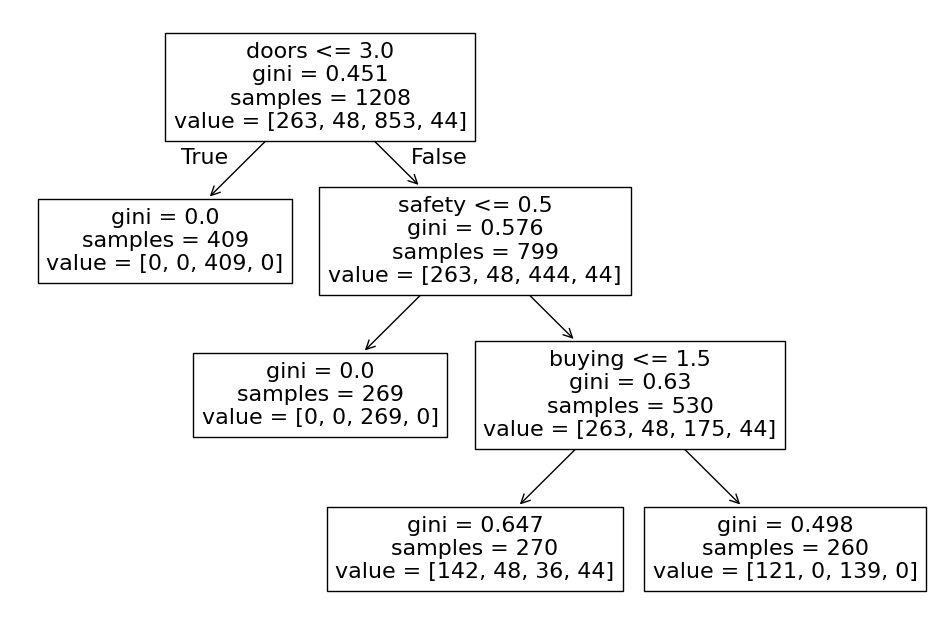

In [42]:
plt.figure(figsize=(12,8))

from sklearn import tree

column_names = categorial_cols + numerical_cols

tree.plot_tree(tree_model.fit(X_train, y_train), feature_names=column_names)

In [43]:
#hyperparameter tuning

In [44]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth" : [1,2,3,4,5,10,15,None],
    "max_features": ["sqrt", "log2", None]
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), cv=5, n_jobs=-1, param_grid=param_grid, scoring="accuracy")

In [47]:
import warnings

warnings.filterwarnings("ignore")

In [48]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [49]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'best'}

In [50]:
y_pred = grid.predict(X_test)

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519

0.9730250481695568


In [52]:
tree_model = DecisionTreeClassifier(max_depth=15, criterion="entropy", max_features=None, splitter="best")

[Text(0.6140202702702703, 0.9615384615384616, 'x[5] <= 3.0\nentropy = 1.192\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.6005067567567568, 0.8846153846153846, 'entropy = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.6072635135135136, 0.9230769230769231, 'True  '),
 Text(0.6275337837837838, 0.8846153846153846, 'x[3] <= 0.5\nentropy = 1.473\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.620777027027027, 0.9230769230769231, '  False'),
 Text(0.6140202702702703, 0.8076923076923077, 'entropy = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6410472972972973, 0.8076923076923077, 'x[0] <= 1.5\nentropy = 1.641\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.40371621621621623, 0.7307692307692307, 'x[1] <= 1.5\nentropy = 1.745\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.19932432432432431, 0.6538461538461539, 'x[3] <= 1.5\nentropy = 1.805\nsamples = 134\nvalue = [43, 48, 8, 35]'),
 Text(0.08108108108108109, 0.5769230769230769, 'x[2] <= 0.5\nentropy = 

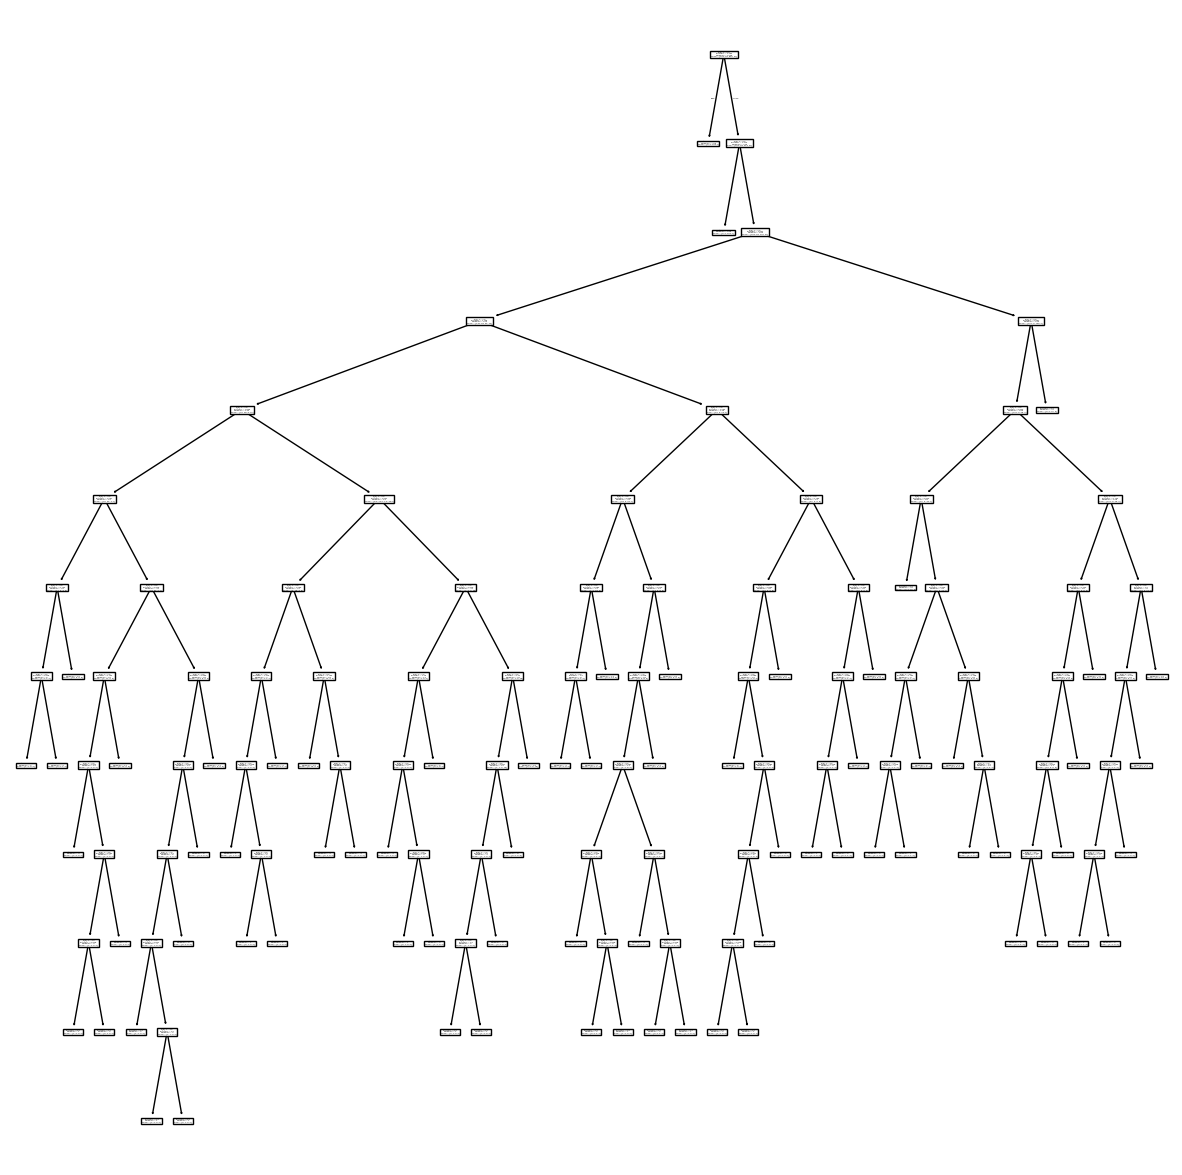

In [54]:
plt.figure(figsize=(15,15))

tree.plot_tree(tree_model.fit(X_train, y_train))